In [1]:
from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace
import numpy as np
import pickle
from sklearn.metrics.pairwise import cosine_similarity
import cv2
from mtcnn import MTCNN
from PIL import Image

In [2]:
feature_list = np.array(pickle.load(open('embedding.pkl','rb')))
filenames = pickle.load(open('filenames.pkl','rb'))

In [3]:
model = VGGFace(model='resnet50',include_top=False,input_shape=(224,224,3),pooling='avg')
detector = MTCNN()

In [24]:
def predict(path):
    # load img -> face detection
    sample_img = cv2.imread('sample/'+path)
    results = detector.detect_faces(sample_img)

    x,y,width,height = results[0]['box']

    face = sample_img[y:y+height,x:x+width]

    # extract its features
    image = Image.fromarray(face)
    image = image.resize((224,224))

    face_array = np.asarray(image)

    face_array = face_array.astype('float32')

    expanded_img = np.expand_dims(face_array,axis=0)
    preprocessed_img = preprocess_input(expanded_img)
    print('presprocessed the image')
    
    result = model.predict(preprocessed_img).flatten()
    
    print('calced the prediction')
    
    similarity = []
    for i in range(len(feature_list)):
        similarity.append(cosine_similarity(result.reshape(1,-1),feature_list[i].reshape(1,-1))[0][0])
        
    print('made the similarity list')

    index_pos = sorted(list(enumerate(similarity)),reverse=True,key=lambda x:x[1])[0][0]
    print('the index is'+str(index_pos))
    print(feature_list[index_pos])
    image_path = filenames[index_pos]
    image = Image.open(image_path)
    image_np = np.array(image)
    print('you look like '+filenames[index_pos].split('\\')[1])
    plt.imshow(image_np)
    plt.axis('off')  # Optionally turn off the axis
    plt.show()
#     temp_img = cv2.imread(filenames[index_pos])
#     print('got the image')
#     cv2.imshow('output',temp_img)
    print('showed the imaged')
#     cv2.waitKey(0)

presprocessed the image
calced the prediction
made the similarity list
the index is6485
[0.         0.         0.         ... 0.         0.00345488 0.        ]
you look like Shilpa_Shetty


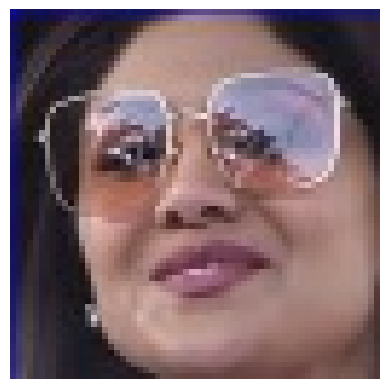

showed the imaged


In [39]:
predict('mum.jpg')

In [23]:
import matplotlib.pyplot as plt